## Accessing Files in the SMCE
#### Rishi Anand

We will use the following libraries to access and analyze data stored in the SMCE.

In [1]:
import xarray as xr
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3fs

### Files smaller than 10 GB

If the file(s) you want to analyze have a cumulative size of smaller than 10 GB, it is possible to download and access them through your personal OSS directory. To do so, select the fifth tab on the left side of the screen (the one with the pink telescope), access the smce-waterinsight-oss-shared bucket, and right click to download the files you want. Then, access them normally as if you were on a normal filesystem.

In [2]:
# Opening the previously downloaded small example file
fp_train = 'Downloads/lis_input_updated_25.nc'
data = xr.open_dataset(fp_train)
predVars = ['LANDCOVER', 'TEXTURE', 'ELEVATION', 'SLOPE', 'ASPECT']

In [3]:
# Clean the data to prevent scaling errors
target_var = 'DKSAT'
allVars = copy.deepcopy(predVars)
allVars.append(target_var)
yRaw = data[target_var].to_numpy()
yRaw[yRaw == -9999] = np.nan

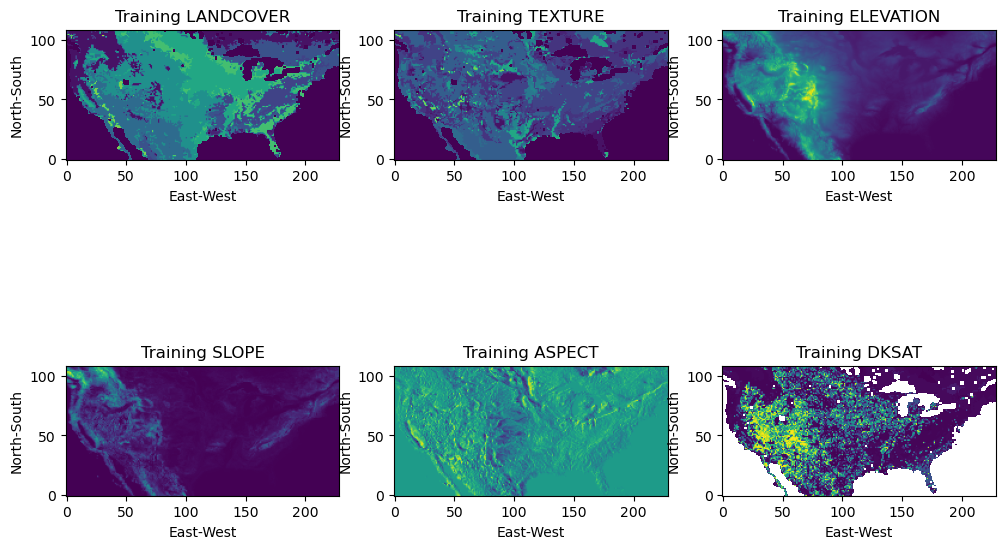

In [4]:
# Plot the variables in one figure
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Then you can access the individual axes like this:
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()
dataAxes = [ax1, ax2, ax3, ax4, ax5]
for axis in range(len(dataAxes)):
    im = dataAxes[axis].imshow(data[predVars[axis]].to_numpy(), origin='lower')
    dataAxes[axis].set_title('Training '+predVars[axis])
    dataAxes[axis].set_xlabel('East-West')
    dataAxes[axis].set_ylabel('North-South')
    if predVars[axis] == 'LANDCOVER':
        im.set_clim(0, 20)
    if predVars[axis] == 'TEXTURE':
        im.set_clim(0, 20)

ax6.imshow(yRaw, origin='lower')
ax6.set_title('Training '+target_var)
ax6.set_xlabel('East-West')
ax6.set_ylabel('North-South')
plt.show()

### Files larger than 10GB

If the file(s) you want to analyze are larger than 10GB, you will have to use the s3 filesystem (s3fs) to access the data. No credentials are required.

In [5]:
url = 's3://nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc'
s3 = s3fs.S3FileSystem({'anon':True})
s3.ls('nasa-waterinsight/test/NLDAS3_Forcing/201501/')

['nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150102.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150103.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150104.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150105.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150106.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150107.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150108.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150109.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150110.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150111.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201

opening
[[      nan       nan       nan ... 296.85736 296.8981  296.94144]
 [      nan       nan       nan ... 296.86792 296.86124 296.9003 ]
 [      nan       nan       nan ... 296.9539  296.9329  296.92773]
 ...
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]]
done


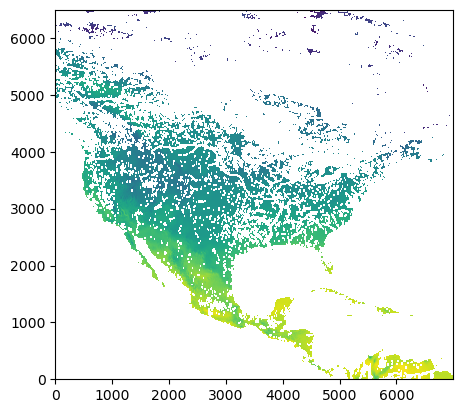

In [6]:
# Open the file specified in url and plot a variable in the data
with s3.open(url) as infile:
    print("opening")
    ds = xr.open_dataset(infile, engine="h5netcdf")
    ds = ds['Tair'].isel(time=0, lon=slice(4000, 11000)).to_numpy()
    print(ds)
    plt.imshow(ds, origin='lower')
    print("done")